In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


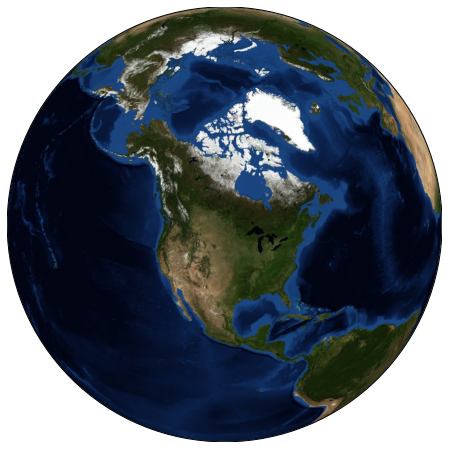

In [3]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [5]:

from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

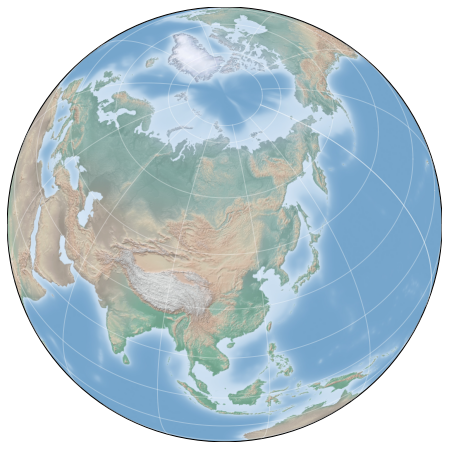

In [37]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=53, lon_0=108)
draw_map(m);

In [17]:
?Basemap

/Users/gleberofeev/PycharmProjects/emergency-hack/.venv/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/gleberofeev/PycharmProjects/emergency-hack/.venv/lib/python3.8/site-packages/pyproj/crs/crs.py:306: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


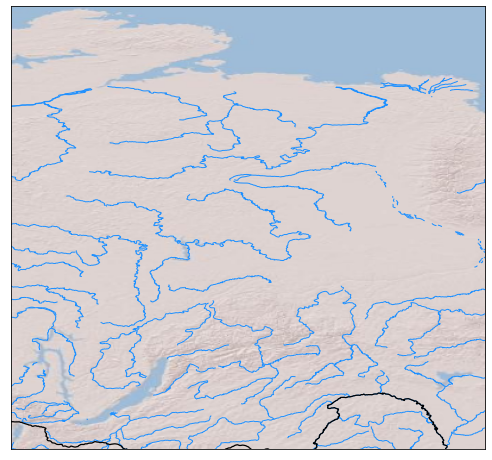

In [42]:
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
 
fig = plt.figure()
fig.set_size_inches([17.05,8.15])
ax = fig.add_subplot(111)
 
# plot basemap, rivers and countries
m = Basemap(llcrnrlat=50, urcrnrlat=78, llcrnrlon=100, urcrnrlon=130, resolution='h')
m.arcgisimage(service='World_Shaded_Relief')
m.drawrivers(color='dodgerblue',linewidth=1.0,zorder=1)
m.drawcountries(color='k',linewidth=1.25)

In [24]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
 
# plot Red River basin
m.readshapefile('../images/Aqueduct_river_basins_LENA/Aqueduct_river_basins_LENA', 'Basin', drawbounds=False)


(1,
 5,
 [103.22048000804597, 52.150000000199896, 0.0, 0.0],
 [141.52083333359155, 73.08749999972537, 0.0, 0.0])

In [29]:
patches = []
for info, shape in zip(m.Basin_info, m.Basin):
    if info['OBJECTID'] == 197: # attribute in attribute table of shapefile
        patches.append(Polygon(np.array(shape), True))
 


/Users/gleberofeev/PycharmProjects/emergency-hack/.venv/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/gleberofeev/PycharmProjects/emergency-hack/.venv/lib/python3.8/site-packages/pyproj/crs/crs.py:306: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


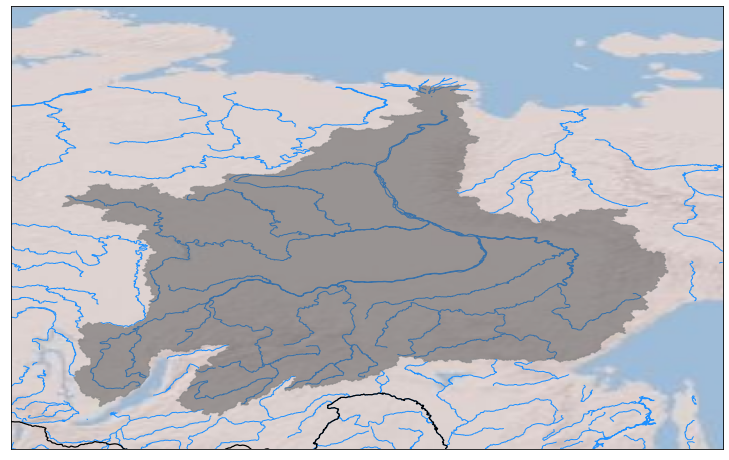

In [45]:
fig = plt.figure()
fig.set_size_inches([17.05,8.15])
ax = fig.add_subplot(111)
 
# plot basemap, rivers and countries
m = Basemap(llcrnrlat=50, urcrnrlat=78, llcrnrlon=100, urcrnrlon=145, resolution='h')
m.arcgisimage(service='World_Shaded_Relief')
m.drawrivers(color='dodgerblue',linewidth=1.0,zorder=1)
m.drawcountries(color='k',linewidth=1.25)
ax.add_collection(PatchCollection(patches, facecolor='0.33', edgecolor='0.5', alpha=0.5))

In [50]:
flow_grap_str = {
    '03019': '03021',
    '03087': '03021',
    '03021': '03024',
    '03024': '03554',
    '03554': '03027',
    '03106': '03555',
    '03555': '03028',
    '03027': '03028',
    '03028': '03029',
    '03029': '03030',
    '03030': '03031',
    '03031': '03032',
    '03032': '03035',
    '03035': '03036',
    '03180': '03036',
    '03169': '03036',
    '03036': '03037',
    '03037': '03038',
    '03038': '03041',
    '03041': '03042',
    '03042': '03045',
    '03045': '03047',
    '03047': '03048',
    '03048': '03230',
    '03229': '03230',
    '03230': '03050'
            }

In [47]:
len(flow_grap)

26

In [48]:
flow_graph_int = dict()
for k,v in flow_grap.items():
    flow_graph_int[int(k)]=int(v)

In [49]:
flow_graph_int

{3019: 3021,
 3087: 3021,
 3021: 3024,
 3024: 3554,
 3554: 3027,
 3106: 3555,
 3555: 3028,
 3027: 3028,
 3028: 3029,
 3029: 3030,
 3030: 3031,
 3031: 3032,
 3032: 3035,
 3035: 3036,
 3180: 3036,
 3169: 3036,
 3036: 3037,
 3037: 3038,
 3038: 3041,
 3041: 3042,
 3042: 3045,
 3045: 3047,
 3047: 3048,
 3048: 3230,
 3229: 3230,
 3230: 3050}